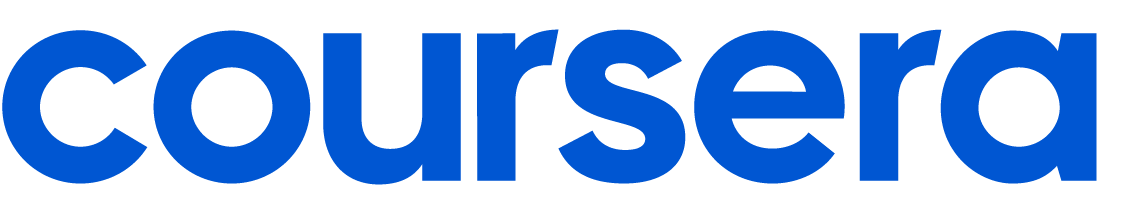

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [ ]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [66]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [67]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
# train_df.head()

train_df Shape: (243787, 21)


In [68]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
# test_df.head()

test_df Shape: (104480, 20)


## Explore, Clean, Validate, and Visualize the Data (optional)



Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [ ]:
# your code here (optional)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

In [47]:
def print_unique_col_values(df):
       for column in df:
#             if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(train_df)

In [69]:
yes_no_columns = ['PaperlessBilling','MultiDeviceAccess','ParentalControl','SubtitlesEnabled']


for col in yes_no_columns:
    train_df[col].replace({'Yes': 1,'No': 0},inplace=True)
    test_df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [70]:
train_df['Gender'].replace({'Female':1,'Male':0},inplace=True)
test_df['Gender'].replace({'Female':1,'Male':0},inplace=True)


**One hot encoding for categorical columns**


In [71]:
df_train = pd.get_dummies(data=train_df, columns=['SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference'])
df_test = pd.get_dummies(data=test_df, columns=['SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference'])

In [72]:
df_train.drop('CustomerID',axis='columns',inplace=True)
df_test.drop('CustomerID',axis='columns',inplace=True)

In [ ]:
print_unique_col_values(df_test)

In [73]:
cols_to_scale = ['AccountAge','MonthlyCharges','TotalCharges','ViewingHoursPerWeek','AverageViewingDuration','ContentDownloadsPerMonth',
                'UserRating','SupportTicketsPerMonth','WatchlistSize']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
df_test[cols_to_scale] = scaler.fit_transform(df_test[cols_to_scale])

In [ ]:
df_train.shape

In [74]:
X_train  = df_train.drop('Churn',axis='columns')
y_train  = df_train['Churn']
X_test = df_test

In [75]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade numpy


**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [77]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(27, input_shape=(33,), activation='relu'),
#     keras.layers.Dense(22, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
epochs = 100
batch_size = 64

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/100
3048/3048 [==============================] - 7s 2ms/step - loss: 0.4208 - accuracy: 0.8221 - val_loss: 0.4128 - val_accuracy: 0.8238
Epoch 2/100
3048/3048 [==============================] - 7s 2ms/step - loss: 0.4137 - accuracy: 0.8233 - val_loss: 0.4096 - val_accuracy: 0.8255
Epoch 3/100
3048/3048 [==============================] - 6s 2ms/step - loss: 0.4135 - accuracy: 0.8236 - val_loss: 0.4096 - val_accuracy: 0.8248
Epoch 4/100
3048/3048 [==============================] - 7s 2ms/step - loss: 0.4133 - accuracy: 0.8236 - val_loss: 0.4092 - val_accuracy: 0.8251
Epoch 5/100
3048/3048 [==============================] - 6s 2ms/step - loss: 0.4132 - accuracy: 0.8238 - val_loss: 0.4096 - val_accuracy: 0.8249
Epoch 6/100
3048/3048 [==============================] - 6s 2ms/step - loss: 0.4129 - accuracy: 0.8240 - val_loss: 0.4098 - val_accuracy: 0.8247
Epoch 7/100
3048/3048 [==============================] - 6s 2ms/step - loss: 0.4128 - accuracy: 0.8238 - val_loss: 0.4092 - val_ac

# *Correlation_matrix Analysis*

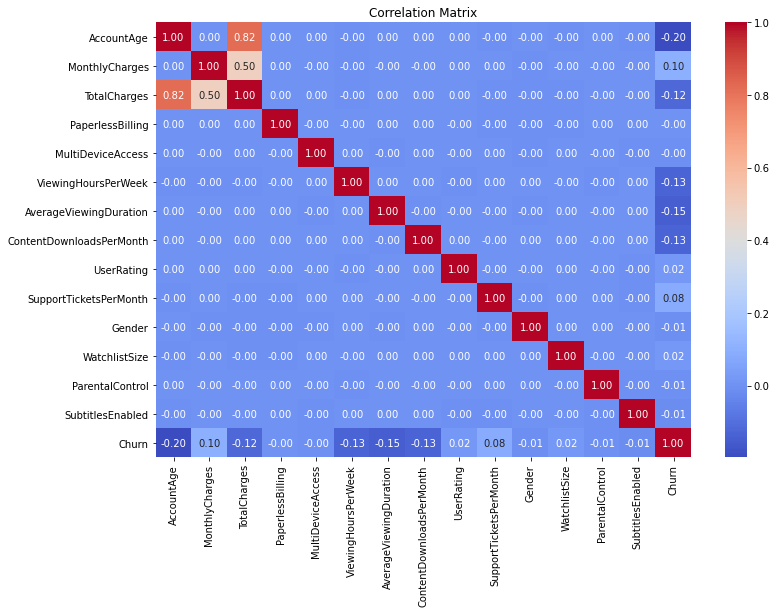

In [84]:
correlation_matrix = train_df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [89]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Initialize the SelectKBest object with the chi2 test as the scoring function
k_best = SelectKBest(score_func=chi2, k=10)  # You can adjust the value of 'k' as needed


# Fit the SelectKBest object on your training data
k_best.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Select the corresponding columns from your data
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_val_selected = X_val.iloc[:, selected_feature_indices]

In [91]:
import tensorflow as tf
from tensorflow import keras

# Create a new model with an input shape that matches the number of selected features (10)
model = keras.Sequential([
    keras.layers.Dense(27, input_shape=(10,), activation='relu'),  # Update the input shape to (10,)
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
epochs = 5
batch_size = 64

model.fit(X_train_selected, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_selected, y_val))

Epoch 1/5
3048/3048 [==============================] - 7s 2ms/step - loss: 0.4218 - accuracy: 0.8201 - val_loss: 0.4113 - val_accuracy: 0.8242
Epoch 2/5
3048/3048 [==============================] - 6s 2ms/step - loss: 0.4140 - accuracy: 0.8236 - val_loss: 0.4105 - val_accuracy: 0.8250
Epoch 3/5
3048/3048 [==============================] - 7s 2ms/step - loss: 0.4140 - accuracy: 0.8234 - val_loss: 0.4103 - val_accuracy: 0.8251
Epoch 4/5
3048/3048 [==============================] - 7s 2ms/step - loss: 0.4138 - accuracy: 0.8233 - val_loss: 0.4103 - val_accuracy: 0.8250
Epoch 5/5
3048/3048 [==============================] - 6s 2ms/step - loss: 0.4138 - accuracy: 0.8234 - val_loss: 0.4102 - val_accuracy: 0.8249


In [93]:
evaluation = model.evaluate(X_val_selected, y_val)
# Extract the evaluation results
loss = evaluation[0]
accuracy = evaluation[1]

print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy:.2f}')

1524/1524 [==============================] - 2s 1ms/step - loss: 0.4102 - accuracy: 0.8249
Loss: 0.41
Accuracy: 0.82


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


# Create an instance of the ANN classifier (you can adjust the architecture as needed)
model = MLPClassifier(hidden_layer_sizes=(27,), activation='relu', max_iter=100, random_state=42)

# Train the ANN model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy}")


# Calculate permutation importances
perm_importance = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=42)

# Get the feature importances
feature_importances = perm_importance.importances_mean

# Rank the features based on importance
feature_ranking = np.argsort(-feature_importances)

# Select the top N features (adjust N as needed)
num_features_to_select = 10
selected_features = X_train.columns[feature_ranking[:num_features_to_select]]

# Now, you can use the selected features for training and testing your ANN model
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Train your ANN model with the selected features
model.fit(X_train_selected, y_train)

# Apply the same feature selection to the test data if needed
X_test_selected = test_df[selected_features]

Validation Accuracy: 0.8241109151318758


KeyError: "['DeviceRegistered_Computer', 'DeviceRegistered_Mobile', 'DeviceRegistered_Tablet'] not in index"

In [56]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
model.evaluate(X_val, y_val)

# Make Predictions
yp = model.predict(X_test)

predicted_probability = []
for element in yp:
    if element > 0.5:
        predicted_probability.append(1)
    else:
        predicted_probability.append(0)

3265/3265 [==============================] - 4s 1ms/step


In [57]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe

prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [58]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0
1,LFR4X92X8H,0
2,QM5GBIYODA,0
3,D9RXTK2K9F,0
4,ENTCCHR1LR,0
5,7A88BB5IO6,0
6,70OMW9XEWR,0
7,EL1RMFMPYL,0
8,4IA2QPT6ZK,0
9,AEDCWHSJDN,0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [59]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [60]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [63]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [64]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [65]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!